## Dataset: MNIST

### 이미지 크기: 28x28 (Gray-scale images of 28x28 pixels)

## 1. Load MNIST

In [1]:
# import

import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from matplotlib import pyplot as plt

In [3]:
# MNIST 데이터셋 불러오기

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100.0%


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100.0%

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




15.9%

100.0%


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100.0%

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
print('X.shape: %s, y.shape: %s'%(training_data.data.shape, training_data.targets.shape))
print('X_test.shape: %s, y_test.shape: %s'%(test_data.data.shape, test_data.targets.shape))

X.shape: torch.Size([60000, 28, 28]), y.shape: torch.Size([60000])
X_test.shape: torch.Size([10000, 28, 28]), y_test.shape: torch.Size([10000])


In [5]:
# 학습 반복 동안 mini-batch의 구성이 계속해서 달라지도록 shuffle=True로 설정
trainloader = DataLoader(training_data, batch_size=64)

# Test 시에는 mini-batch 구성의 순서가 상관없으므로 shuffle=False로 설정
testloader = DataLoader(test_data, batch_size=64)

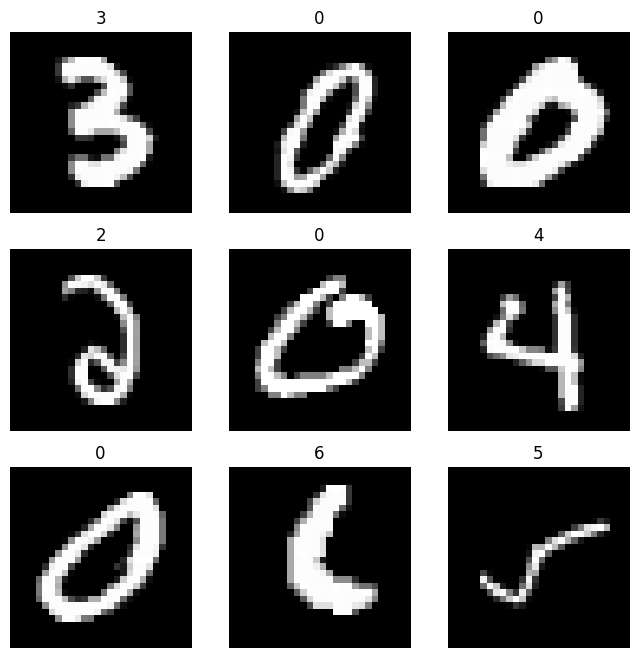

In [6]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

shape of image: torch.Size([1, 28, 28])
label: 5


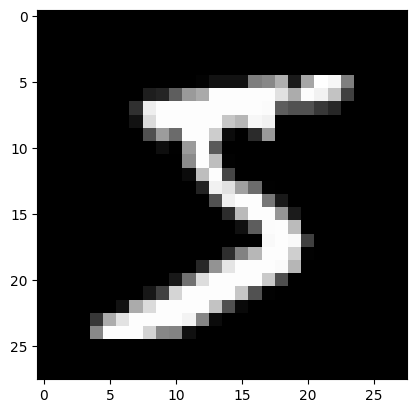

In [7]:
# 이미지 shape와 출력 예시 확인

img, label = trainloader.dataset[0]
print('shape of image:', img.shape)
print('label:', label)
plt.imshow(img.squeeze(), cmap="gray")

## 2. Define a Feedforward Neural Network

In [8]:
# 모델 정의

import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        
        # 2D array -> 1D array 변환을 위한 flatten 함수 정의
        self.flatten = nn.Flatten()

        # nn.Sequential 활용한 fully-connected layer 함수 정의
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        # flatten all dimensions except batch
        x = self.flatten(x)

        # fully-connected layers
        x = self.linear_relu_stack(x)
        
        return x

net = NeuralNetwork()

## 3. Define a Loss Function and Optimizer

In [9]:
# hyperparmeter 설정
learning_rate = 1e-3
num_epochs = 5

In [10]:
# loss function 및 optimizer 설정

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

## 4. Train the Network

In [11]:
# 여러 epoch을 반복하며 NN 모델 학습

for epoch in range(num_epochs):

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
        if i % 100 == 0:
            if i > 0:
                print('epoch: %d, iter: %d, loss: %.3f'%((epoch+1), i, running_loss/100))
                running_loss = 0.0

    print('%d epoch processed...'%(epoch+1))

print('Finished Training')

epoch: 1, iter: 100, loss: 0.624
epoch: 1, iter: 200, loss: 0.326
epoch: 1, iter: 300, loss: 0.246
epoch: 1, iter: 400, loss: 0.195
epoch: 1, iter: 500, loss: 0.190
epoch: 1, iter: 600, loss: 0.168
epoch: 1, iter: 700, loss: 0.153
epoch: 1, iter: 800, loss: 0.168
epoch: 1, iter: 900, loss: 0.123
1 epoch processed...
epoch: 2, iter: 100, loss: 0.107
epoch: 2, iter: 200, loss: 0.117
epoch: 2, iter: 300, loss: 0.103
epoch: 2, iter: 400, loss: 0.092
epoch: 2, iter: 500, loss: 0.092
epoch: 2, iter: 600, loss: 0.092
epoch: 2, iter: 700, loss: 0.088
epoch: 2, iter: 800, loss: 0.088
epoch: 2, iter: 900, loss: 0.067
2 epoch processed...
epoch: 3, iter: 100, loss: 0.066
epoch: 3, iter: 200, loss: 0.066
epoch: 3, iter: 300, loss: 0.066
epoch: 3, iter: 400, loss: 0.059
epoch: 3, iter: 500, loss: 0.056
epoch: 3, iter: 600, loss: 0.061
epoch: 3, iter: 700, loss: 0.062
epoch: 3, iter: 800, loss: 0.057
epoch: 3, iter: 900, loss: 0.048
3 epoch processed...
epoch: 4, iter: 100, loss: 0.045
epoch: 4, ite

In [12]:
# 학습된 모델 저장하기

PATH = './mnist_fnnet.pth'
torch.save(net.state_dict(), PATH)

In [13]:
# 저장된 모델의 Parameter 불러오기

net = NeuralNetwork()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

## 5. Test the Network on the Test Data


In [14]:
from sklearn.metrics import accuracy_score
import numpy as np

In [15]:
# 전체 test set에 대한 accuracy

pred_list = []
labels_list = []

# 모델 학습을 종료하였으므로 gradient 계산을 할 필요가 없음
with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        # 샘플 이미지에 대한 model output 출력
        outputs = net(images)
        
        # model output에 기반한 예측 결과 출력
        pred = outputs.argmax(1)

        
        pred_list.append(pred)
        labels_list.append(labels)


pred_list = np.hstack(pred_list)
labels_list = np.hstack(labels_list)

acc = accuracy_score(pred_list, labels_list)

print('Accuracy of the network on the 10000 test images:', acc)

Accuracy of the network on the 10000 test images: 0.9716


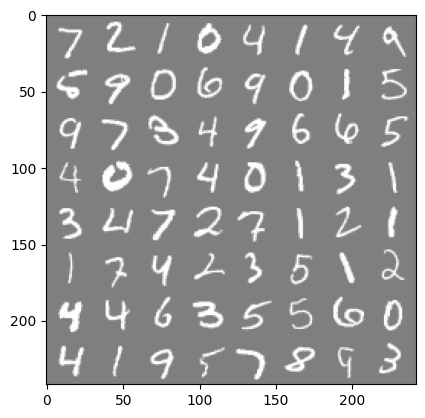

Ground Truth: ['7', '2', '1', '0', '4', '1', '4', '9', '5', '9', '0', '6', '9', '0', '1', '5', '9', '7', '3', '4', '9', '6', '6', '5', '4', '0', '7', '4', '0', '1', '3', '1', '3', '4', '7', '2', '7', '1', '2', '1', '1', '7', '4', '2', '3', '5', '1', '2', '4', '4', '6', '3', '5', '5', '6', '0', '4', '1', '9', '5', '7', '8', '9', '3']


In [16]:
# Test set 샘플 이미지 출력해보기

# batch size 만큼의 이미지 샘플 추출
dataiter = iter(testloader)
images, labels = next(dataiter)


# print images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

    
imshow(torchvision.utils.make_grid(images))


ground_truth_list = []
for label in labels:
    true_label = labels_map[label.item()]
    ground_truth_list.append(true_label)

print('Ground Truth:', ground_truth_list)

In [17]:
# 샘플에 대한 예측 수행 후 실제 값과 일치하는 지 비교해보기

outputs = net(images)

preds = outputs.argmax(1)

pred_label_list = []
for pred in preds:
    pred_label = labels_map[pred.item()]
    pred_label_list.append(pred_label)

print('Predicted: ', pred_label_list)

Predicted:  ['7', '2', '1', '0', '4', '1', '4', '9', '5', '9', '0', '6', '9', '0', '1', '5', '9', '7', '3', '4', '9', '6', '6', '5', '4', '0', '7', '4', '0', '1', '3', '1', '3', '4', '7', '2', '7', '1', '2', '1', '1', '7', '4', '2', '3', '5', '1', '2', '4', '4', '6', '3', '5', '5', '6', '0', '4', '1', '9', '5', '7', '8', '9', '3']
